In [ ]:
#World Population Prediction model 
#Importing necessary files
import numpy as np 
import pandas as pd 

In [ ]:
#Loading the dataset
data = pd.read_csv('/content/World_population(1951-2020).csv')

In [ ]:
data.sample(10)
#After taking the sample of data ,we see that the data is not clean

,Year,World Population,Yearly Change,Net Change,Density (P/Km²),Urban Pop,Urban Pop %
28,1993.0,"5,58,15,97,546",1.50%,"8,26,77,737",37.0,"2,46,12,23,528",44%
26,1995.0,"5,74,42,12,979",1.43%,"8,10,62,552",39.0,"2,57,55,05,235",45%
48,1973.0,"3,92,77,80,238",1.98%,"7,61,29,993",26.0,"1,46,21,78,370",37%
4,2017.0,"7,54,78,58,925",1.12%,"8,38,36,876",51.0,"4,14,01,88,594",55%
56,1965.0,"3,33,95,83,597",2.00%,"6,56,05,259",22.0,"1,18,84,69,224",36%
64,1957.0,"2,87,33,06,090",1.80%,"5,08,62,808",19.0,"93,31,13,168",32%
5,2016.0,"7,46,40,22,049",1.14%,"8,42,24,910",50.0,"4,06,06,52,683",54%
46,1975.0,"4,07,94,80,606",1.89%,"7,56,86,434",27.0,"1,53,86,24,994",38%
29,1992.0,"5,49,89,19,809",1.56%,"8,46,30,365",37.0,"2,40,43,37,297",44%
15,2006.0,"6,62,35,17,833",1.25%,"8,16,10,806",44.0,"3,28,94,46,226",50%


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              70 non-null     float64
 1   World Population  70 non-null     object 
 2   Yearly Change     70 non-null     object 
 3   Net Change        70 non-null     object 
 4   Density (P/Km²)   70 non-null     float64
 5   Urban Pop         70 non-null     object 
 6   Urban Pop %       70 non-null     object 
dtypes: float64(2), object(5)
memory usage: 4.0+ KB


In [ ]:
#Checking if there is any NULL values
data.isnull().sum()

Year                1
World Population    1
Yearly Change       1
Net Change          1
Density (P/Km²)     1
Urban Pop           1
Urban Pop %         1
dtype: int64

In [ ]:
#cleaning the data and removing null values
data=data.dropna()
data.isnull().sum()

Year                0
World Population    0
Yearly Change       0
Net Change          0
Density (P/Km²)     0
Urban Pop           0
Urban Pop %         0
dtype: int64

In [ ]:
#visualising the data
import matplotlib.pyplot as plt
import seaborn as sns
data_without_year = data.drop('Year',axis = 1)


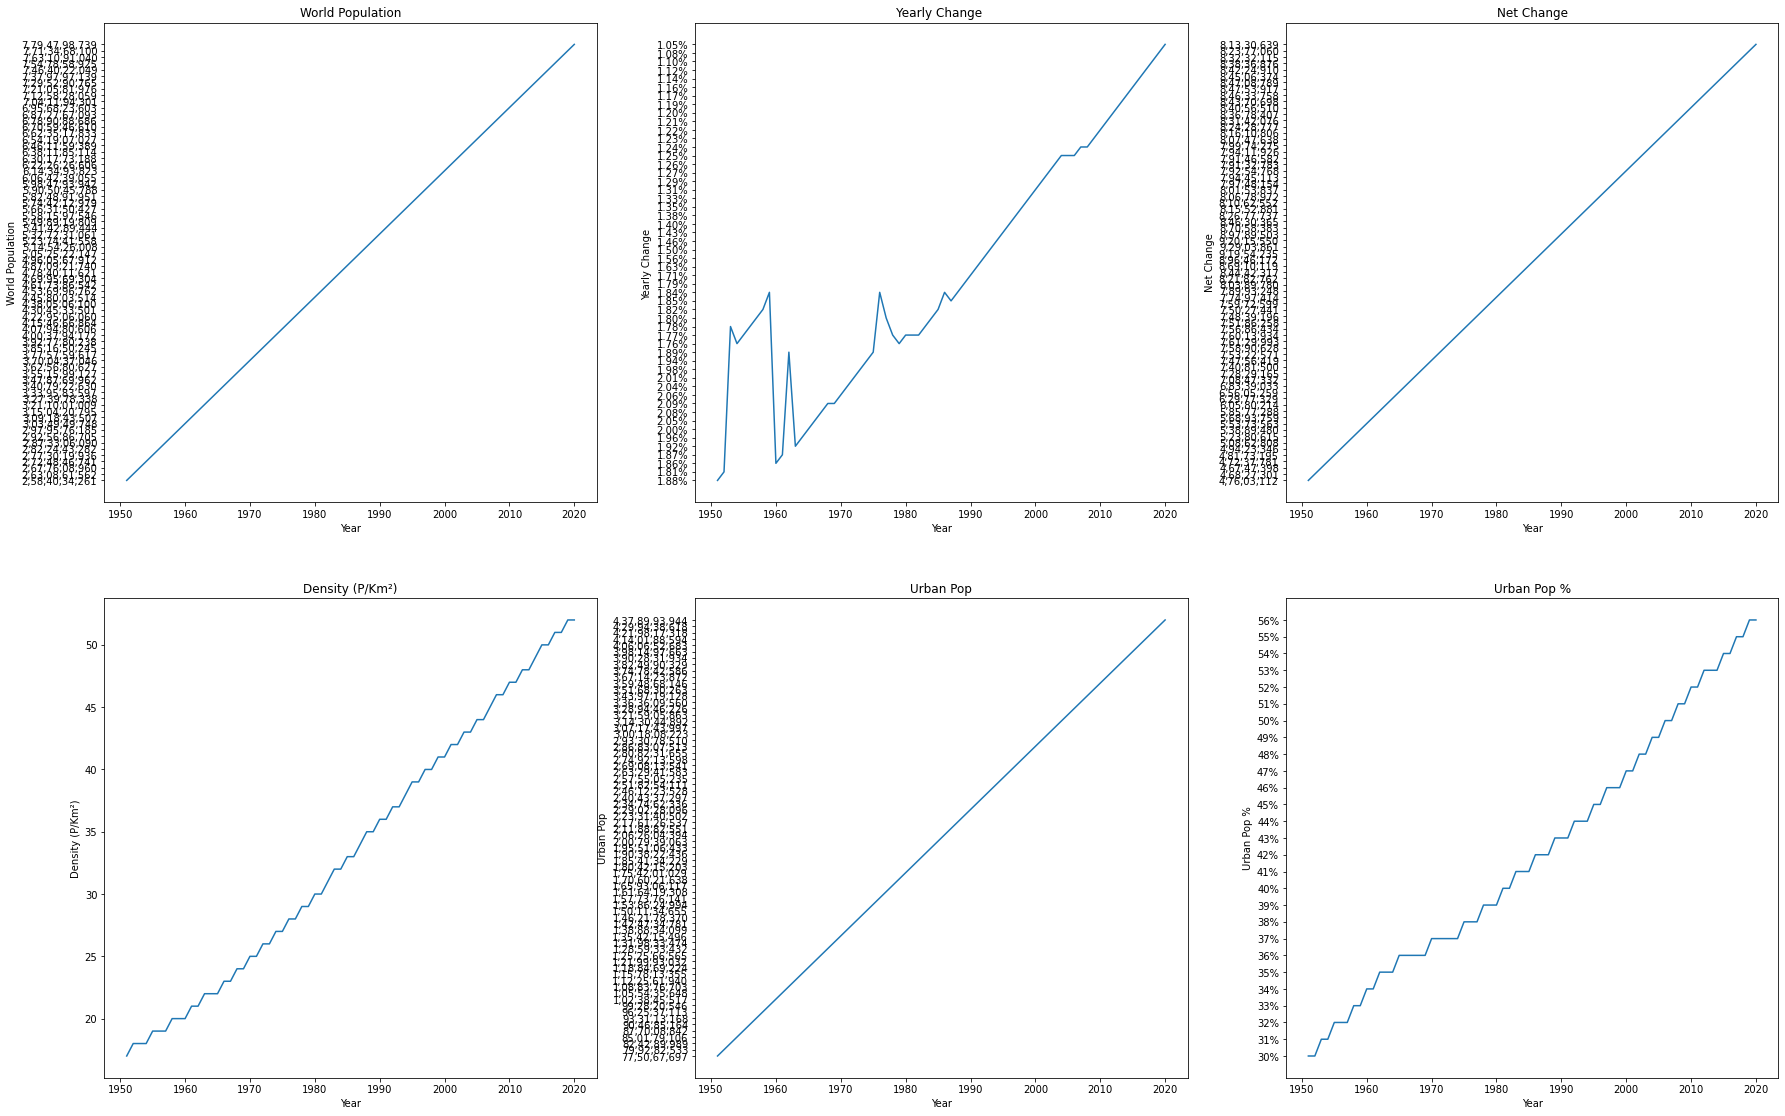

In [ ]:
plt.figure(figsize = (30,30))
for i, feature in enumerate(data_without_year.columns):
    ax = plt.subplot(3,3,i+1)
    sns.lineplot(x = data['Year'], y = data_without_year[feature])
    ax.set_title(feature)

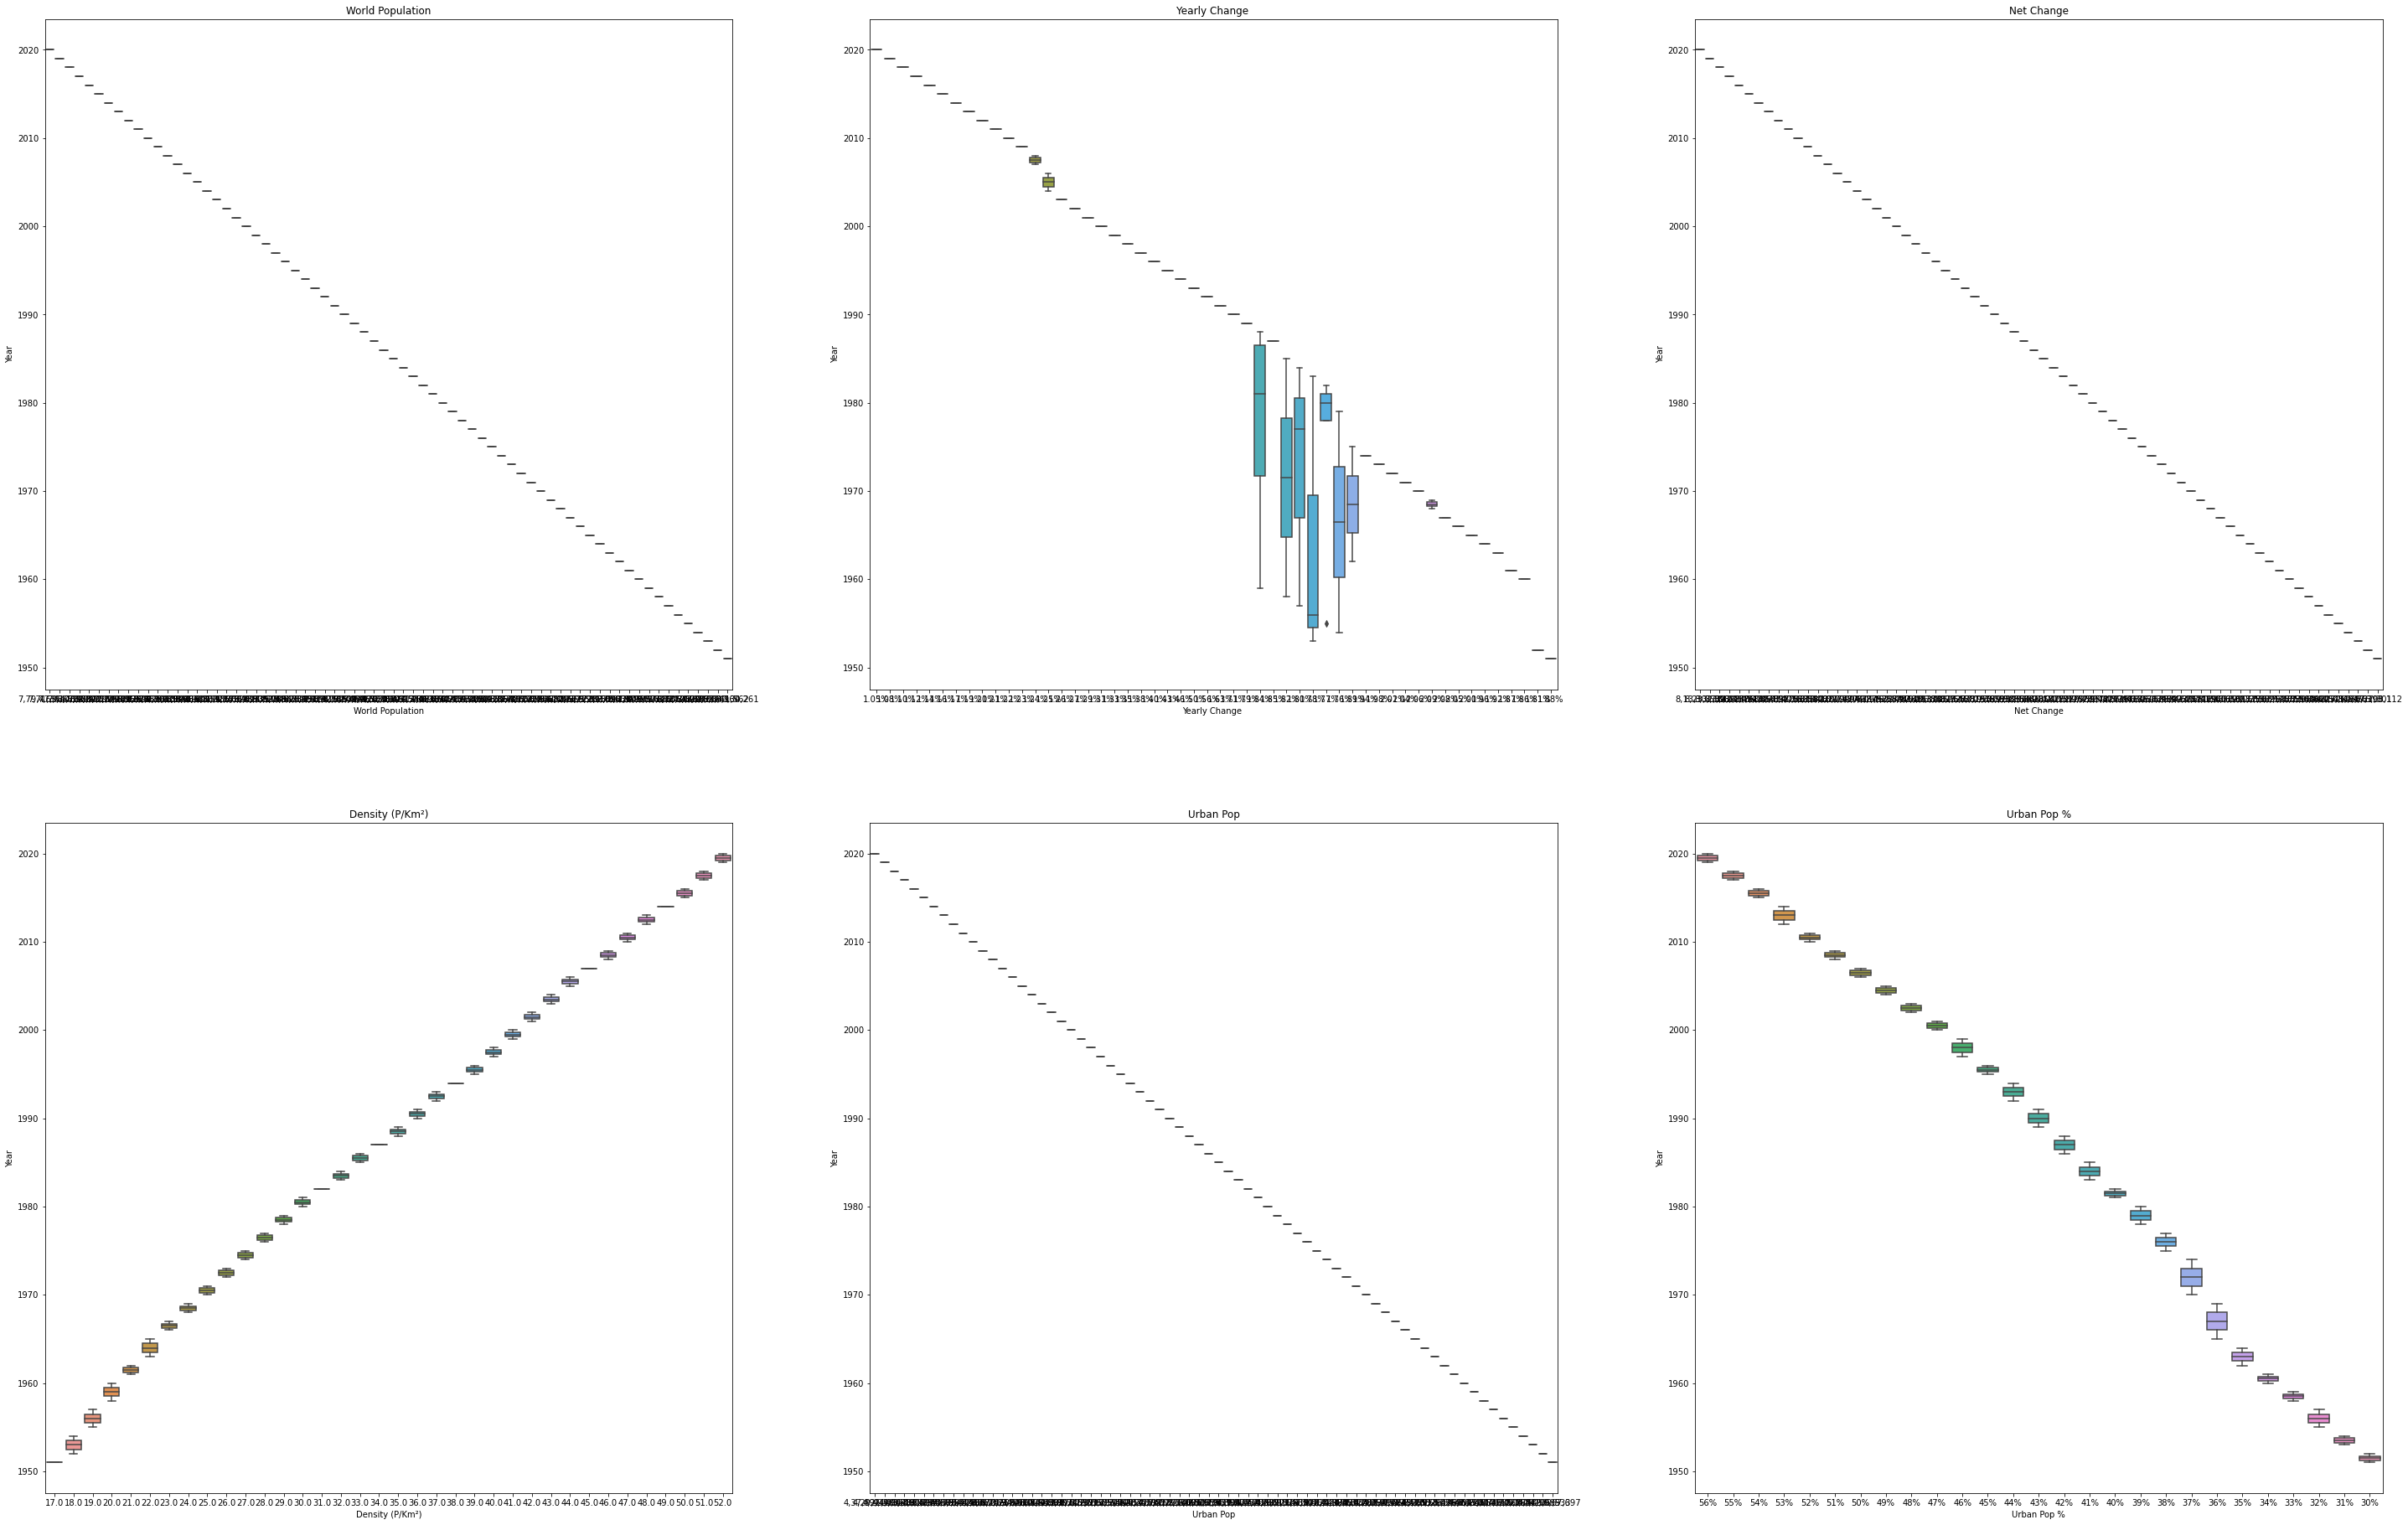

In [ ]:
plt.figure(figsize = (50,50))
for i,feature in enumerate(data_without_year.columns):
    ax = plt.subplot(3,3,i+1)

    sns.boxplot(x = data_without_year[feature],y= data['Year'], orient='v')
    ax.set_title(feature)


In [ ]:
#Removing commas,% etc from the data to clean it 
data['World Population'] = data['World Population'].apply(lambda x:x.replace(',', ''))
data['Urban Pop'] = data['Urban Pop'].apply(lambda x:x.replace(',', ''))
data['Net Change'] = data['Net Change'].apply(lambda x:x.replace(',', ''))
data['Yearly Change '] = data['Yearly Change '].apply(lambda x:x.replace('%', ''))
data['Urban Pop %'] = data['Urban Pop %'].apply(lambda x:x.replace('%', ''))
data


,Year,World Population,Yearly Change,Net Change,Density (P/Km²),Urban Pop,Urban Pop %
1,2020.0,7794798739,1.05,81330639,52.0,4378993944,56
2,2019.0,7713468100,1.08,82377060,52.0,4299438618,56
3,2018.0,7631091040,1.10,83232115,51.0,4219817318,55
4,2017.0,7547858925,1.12,83836876,51.0,4140188594,55
5,2016.0,7464022049,1.14,84224910,50.0,4060652683,54
...,...,...,...,...,...,...,...
66,1955.0,2773019936,1.77,48173195,19.0,877008842,32
67,1954.0,2724846741,1.76,47237781,18.0,850179106,31
68,1953.0,2677608960,1.78,46747398,18.0,824289989,31
69,1952.0,2630861562,1.81,46827301,18.0,799282533,30


In [ ]:
#From box-plot, Yearlychange in population has outliers. So, we will remove it for model building.
# Since, feature Urban is highly correlated to Population which can lead to overfitting we will remove it too.
x = np.array(data.drop(['World Population','Yearly Change ','Urban Pop'],axis=1))
y = np.array(data['World Population'])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_target=StandardScaler()
y = scaler_target.fit_transform(y.reshape(-1, 1))
scaler.fit(x)
x = scaler.transform(x)
x = pd.DataFrame(x)
y = pd.DataFrame(y)
x.head()

,0,1,2,3
0,1.707481,0.497700,1.732193,1.866326
1,1.657989,0.581550,1.732193,1.866326
2,1.608497,0.650067,1.638271,1.731085
3,1.559005,0.698526,1.638271,1.731085
4,1.509513,0.729620,1.544349,1.595844


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
x_test

,0,1,2,3
22,0.618653,0.370894,0.605127,0.513916
0,1.707481,0.497700,1.732193,1.866326
49,-0.717637,0.016269,-0.803705,-0.703253
4,1.509513,0.729620,1.544349,1.595844
54,-0.965098,-0.543327,-0.991550,-0.838494
18,0.816622,0.322690,0.792971,0.784398
10,1.212559,0.716126,1.262582,1.325362
33,0.074238,1.348976,0.041594,-0.027048
45,-0.519668,0.045426,-0.615861,-0.568012
12,1.113575,0.642852,1.168660,1.190121


In [ ]:
#Taking user input in a list
lst = []
n = 4 #since world population is dependent on 4 attributes
for i in range(n):
	ele = float(input())

	lst.append(ele)
	
print(lst)



2023
77847862
54
56
[2023.0, 77847862.0, 54.0, 56.0]


In [ ]:
#converting list to array
ls = np.array(lst)
ls.resize((1,len(lst)))
ls=scaler.transform(ls)


In [ ]:
lr_model = lr.fit(x_train,y_train)
y_pred = lr_model.predict(x_test)
y_pred

array([[ 0.6130597 ],
       [ 1.74860046],
       [-0.78809739],
       [ 1.54338859],
       [-0.98705746],
       [ 0.81191419],
       [ 1.24830425],
       [ 0.00947757],
       [-0.59214824],
       [ 1.15224666],
       [ 0.10790075],
       [ 1.26879953],
       [-1.48425188],
       [ 1.52124163],
       [-1.28131923],
       [ 0.19107172],
       [-1.15694739],
       [-0.07512889],
       [-1.08550286],
       [-0.69197138],
       [ 0.90821229]])

In [ ]:
#for taking user input
lr_model = lr.fit(x_train,y_train)
y_pred = lr_model.predict(ls)
y_pred

array([[1.9336211]])

In [ ]:
#Converting scalar values back to normal
res = scaler_target.inverse_transform(y_pred)
res

array([[8.06379005e+09]])

In [ ]:
#print(y_test.shape)
#print(y_pred.shape)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.0004210212883174688

In [ ]:
print("Score ", lr_model.score(x_test,y_test)*100)

Score  99.96108652988373


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
Knr=KNeighborsRegressor()

In [ ]:
#Taking user input in a list
lst = []
n = 4 #since world population is dependent on 4 attributes
for i in range(n):
	ele = float(input())

	lst.append(ele)
	
print(lst)



2023
77847862
54
56
[2023.0, 77847862.0, 54.0, 56.0]


In [ ]:
#converting list to array
ls = np.array(lst)
ls.resize((1,len(lst)))
ls=scaler.transform(ls)

In [ ]:
Knr_model = Knr.fit(x_train,y_train)
y_pred = Knr_model.predict(x_test)
y_pred

array([[ 5.90085320e-01],
       [ 1.56472142e+00],
       [-7.92814755e-01],
       [ 1.49049838e+00],
       [-9.77671283e-01],
       [ 8.01216032e-01],
       [ 1.28837737e+00],
       [ 1.00182371e-01],
       [-5.64074122e-01],
       [ 1.11906945e+00],
       [ 1.00182371e-01],
       [ 1.28837737e+00],
       [-1.44935282e+00],
       [ 1.49049838e+00],
       [-1.32960250e+00],
       [ 2.00923042e-01],
       [-1.17340672e+00],
       [-7.81178367e-04],
       [-1.17340672e+00],
       [-6.40375722e-01],
       [ 9.42898560e-01]])

In [ ]:
#for taking user input
knr_model = Knr.fit(x_train,y_train)
y_pred = knr_model.predict(ls)
y_pred

array([[1.56472142]])

In [ ]:
#Converting scalar values back to normal
res = scaler_target.inverse_transform(y_pred)
res

array([[7.47965816e+09]])

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.0032316701439786127

In [ ]:
print("Score ", knr_model.score(x_test,y_test)*100)

Score  99.70130845384114
